In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv('../Data/Sunspots.csv', index_col='Date', parse_dates=True)

In [33]:
df = df.drop(columns=["Unnamed: 0"])

In [34]:
df.rename(columns={'Monthly Mean Total Sunspot Number': 'Sunspots'}, inplace=True)

In [35]:
df.columns

Index(['Sunspots'], dtype='object')

In [36]:
df

,Sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [37]:
df['year'] = df.index.year
df['month'] = df.index.month

In [38]:
df

,Sunspots,year,month
Date,,,
1749-01-31,96.7,1749,1
1749-02-28,104.3,1749,2
1749-03-31,116.7,1749,3
1749-04-30,92.8,1749,4
1749-05-31,141.7,1749,5
...,...,...,...
2020-09-30,0.6,2020,9
2020-10-31,14.4,2020,10
2020-11-30,34.0,2020,11


In [40]:
## Lag
for i in range(1, 13):
    df[f'lag_{i}'] = df['Sunspots'].shift(i)

In [41]:
# 3. Fitur Rolling Window (rata-rata bergerak)
df['rolling_mean_12'] = df['Sunspots'].shift(1).rolling(window=12).mean()

In [42]:
df

,Sunspots,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,,
1749-01-31,96.7,1749,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-02-28,104.3,1749,2,96.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-03-31,116.7,1749,3,104.3,96.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-04-30,92.8,1749,4,116.7,104.3,96.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-05-31,141.7,1749,5,92.8,116.7,104.3,96.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,0.6,2020,9,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,1.1,3.016667
2020-10-31,14.4,2020,10,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,2.975000
2020-11-30,34.0,2020,11,14.4,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,4.141667


In [43]:
df.dropna(inplace=True)

In [44]:
df

,Sunspots,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,,
1750-01-31,122.2,1750,1,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,96.7,134.875000
1750-02-28,126.5,1750,2,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,137.000000
1750-03-31,148.7,1750,3,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,138.850000
1750-04-30,147.2,1750,4,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,141.516667
1750-05-31,150.0,1750,5,147.2,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,146.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,0.6,2020,9,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,1.1,3.016667
2020-10-31,14.4,2020,10,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,2.975000
2020-11-30,34.0,2020,11,14.4,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,4.141667


In [46]:
print("Data setelah rekayasa fitur (5 baris pertama):")
df.head()

Data setelah rekayasa fitur (5 baris pertama):


,Sunspots,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,,
1750-01-31,122.2,1750,1,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,96.7,134.875000
1750-02-28,126.5,1750,2,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,137.000000
1750-03-31,148.7,1750,3,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,138.850000
1750-04-30,147.2,1750,4,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,141.516667
1750-05-31,150.0,1750,5,147.2,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,146.050000


In [55]:
# --- Langkah 3: Memisahkan Fitur (X) dan Target (y) ---
# X adalah semua kolom fitur yang kita buat
features = ['year', 'month', 'rolling_mean_12'] + [f'lag_{i}' for i in range(1, 13)]
X = df.drop(columns=['Sunspots'], axis=1) #bisa juga X = df[features]

# y adalah nilai yang ingin kita prediksi
y = df['Sunspots']

In [56]:
X

,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,
1750-01-31,1750,1,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,96.7,134.875000
1750-02-28,1750,2,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,137.000000
1750-03-31,1750,3,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,138.850000
1750-04-30,1750,4,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,141.516667
1750-05-31,1750,5,147.2,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,146.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,2020,9,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,1.1,3.016667
2020-10-31,2020,10,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,2.975000
2020-11-30,2020,11,14.4,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,4.141667


In [57]:
y

Date
1750-01-31    122.2
1750-02-28    126.5
1750-03-31    148.7
1750-04-30    147.2
1750-05-31    150.0
              ...  
2020-09-30      0.6
2020-10-31     14.4
2020-11-30     34.0
2020-12-31     21.8
2021-01-31     10.4
Name: Sunspots, Length: 3253, dtype: float64

In [58]:
# --- Langkah 4: Membagi Data menjadi Training dan Testing ---
# PENTING: Untuk time series, data tidak boleh diacak.
# Kita akan membagi berdasarkan waktu.
split_date = '2001-01-01'
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

In [62]:
len(X_train)

3012

In [63]:
len(X_test)

241

In [64]:
gbr = GradientBoostingRegressor(
    n_estimators=500,     # Jumlah pohon keputusan
    learning_rate=0.05,   # Seberapa cepat model belajar
    max_depth=5,          # Kedalaman maksimum setiap pohon
    random_state=42,
    loss='squared_error'
)

In [66]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          random_state=42)

In [67]:
prediction = gbr.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error pada data test: {mse:.2f}")

Mean Squared Error pada data test: 480.50


In [69]:
from sklearn.metrics import r2_score

In [70]:
r2 = r2_score(y_test, prediction)

In [71]:
r2

0.829249188561103

In [72]:
results = pd.DataFrame({'Asli': y_test, 'Prediksi': prediction}, index=y_test.index)

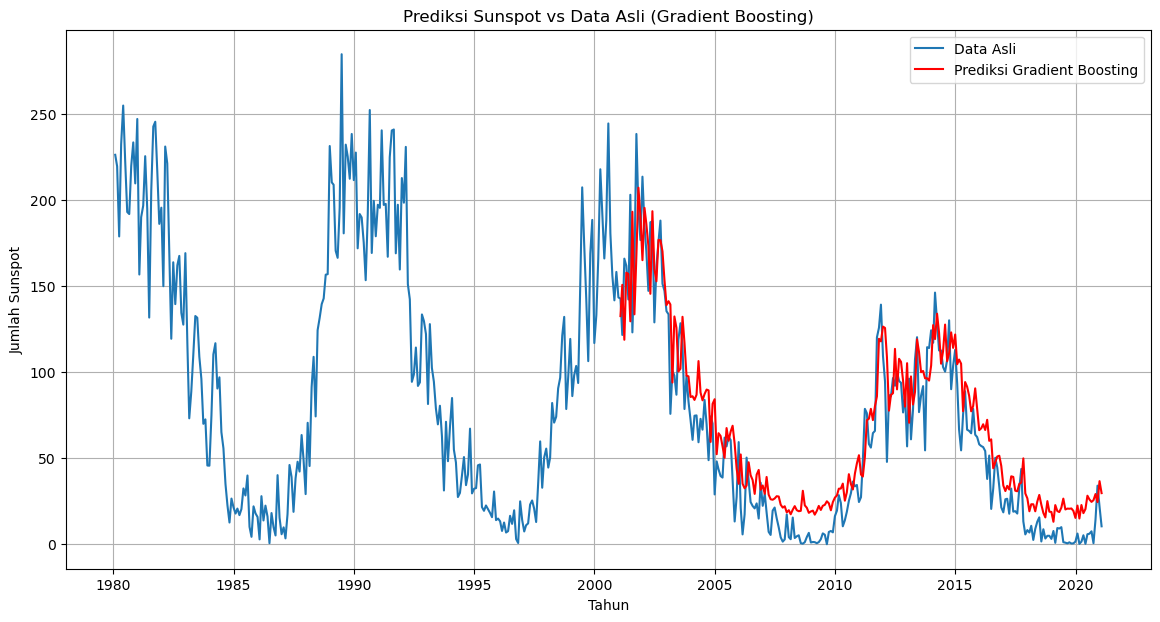

In [74]:
plt.figure(figsize=(14, 7))
plt.plot(df['Sunspots']['1980':], label='Data Asli')
plt.plot(results['Prediksi'], label='Prediksi Gradient Boosting', color='red')
plt.title('Prediksi Sunspot vs Data Asli (Gradient Boosting)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Sunspot')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
print("Melakukan forecast untuk masa depan...")

# Ambil data terakhir dari dataset sebagai titik awal
last_data = df.iloc[-1]
future_forecasts = []
current_features = last_data[features].values.reshape(1, -1)
last_known_sunspot = last_data['Sunspots']
history = list(df['Sunspots'].values)

Melakukan forecast untuk masa depan...


In [79]:
n_forecast = 60
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')

for i in range(n_forecast):
    # Prediksi 1 langkah ke depan
    next_pred = gbr.predict(current_features)[0]
    future_forecasts.append(next_pred)

    # Update history dengan nilai prediksi baru
    history.append(next_pred)

    # Siapkan fitur untuk langkah berikutnya
    # 1. Dapatkan tanggal baru
    next_date = forecast_index[i]

    # 2. Buat fitur lag dari history yang sudah diupdate
    new_lags = history[-12:] # Ambil 12 nilai terakhir
    new_lags.reverse()

    # 3. Buat fitur rolling mean
    new_rolling_mean = np.mean(history[-13:-1]) # Rata-rata 12 bulan sebelum prediksi

    # 4. Gabungkan semua fitur baru
    current_features = np.array([[next_date.year, next_date.month, new_rolling_mean] + new_lags]).reshape(1, -1)

forecast_df = pd.Series(future_forecasts, index=forecast_index)


/var/folders/p3/0mc5zsd91bdcw4p37s0rxmf80000gn/T/ipykernel_7401/3948809785.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.

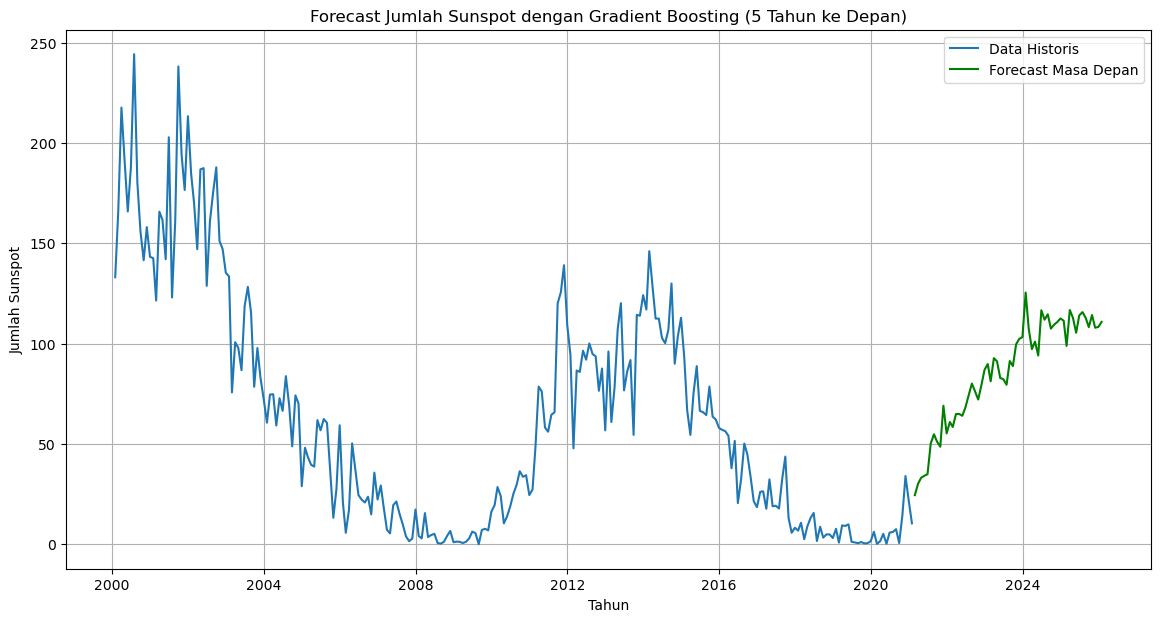

In [80]:
plt.figure(figsize=(14, 7))
plt.plot(df['Sunspots']['2000':], label='Data Historis')
plt.plot(forecast_df, label='Forecast Masa Depan', color='green')
plt.title('Forecast Jumlah Sunspot dengan Gradient Boosting (5 Tahun ke Depan)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Sunspot')
plt.legend()
plt.grid(True)
plt.show()